In [40]:
import pandas as pd
import pylab as plt
import numpy as np
from patsy import dmatrices
import pandas.plotting as rplot
from matplotlib.ticker import NullFormatter
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model,feature_selection,preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn import metrics

In [41]:
df = pd.read_csv('titanic_data.csv')

In [42]:
df['Pclass'].isnull().value_counts()

False    891
Name: Pclass, dtype: int64

In [43]:
df['Survived'].isnull().value_counts()

False    891
Name: Survived, dtype: int64

In [44]:
#Passengers survived in each class
survivors = df.groupby('Pclass')['Survived'].agg(sum)

In [45]:
#Total Passenger in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
survivor_percentage = survivors / total_passengers

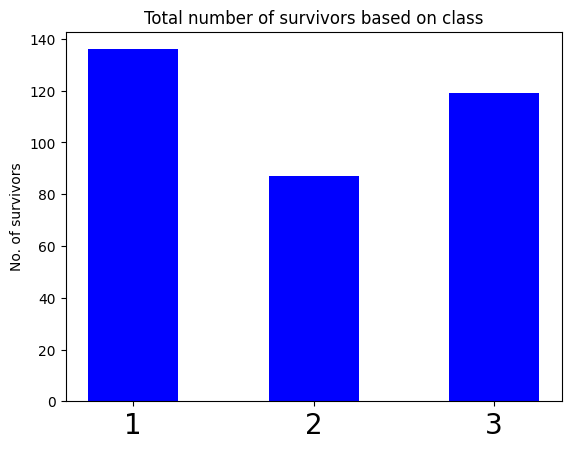

In [46]:
#Plotting the Total number of survivors
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(), survivors, color='blue', width=0.5)
ax.set_ylabel('No. of survivors')
ax.set_title('Total number of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

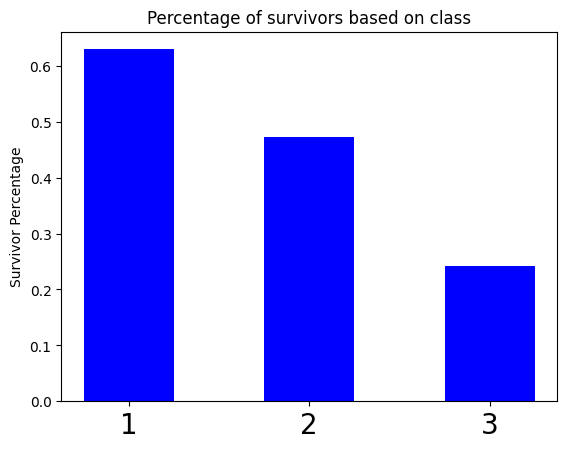

In [47]:
#Plotting the percentage of survivors in each class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivor_percentage.index.values.tolist(), 
              survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

What is the distribution of survivors based on gender among the various classes?

In [48]:
#Checking for any null values

In [49]:
df['Sex'].isnull().value_counts()

False    891
Name: Sex, dtype: int64

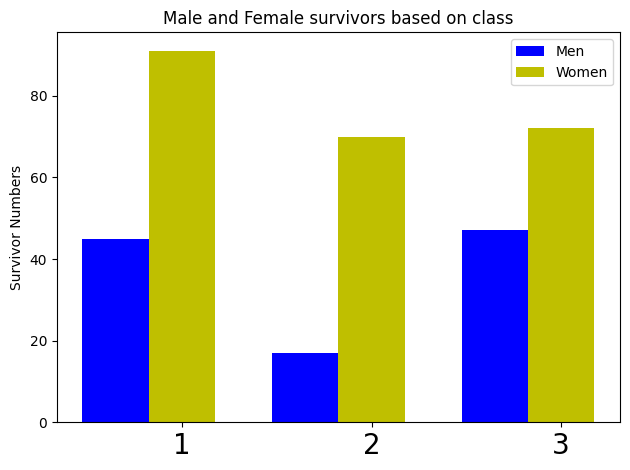

In [50]:
# Male Passengers survived in each class
male_survivors = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].agg(sum)

#Total Male Passengers in each class
male_total_passengers = df[df['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()

male_survivor_percentage = male_survivors / male_total_passengers

# Female Passengers survived in each class
female_survivors = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].agg(sum)

#Total Female Passengers in each class
female_total_passengers = df[df['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()

female_survivor_percentage = female_survivors / female_total_passengers

#Plotting the total passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivors, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width, color='y', label='Women')
ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

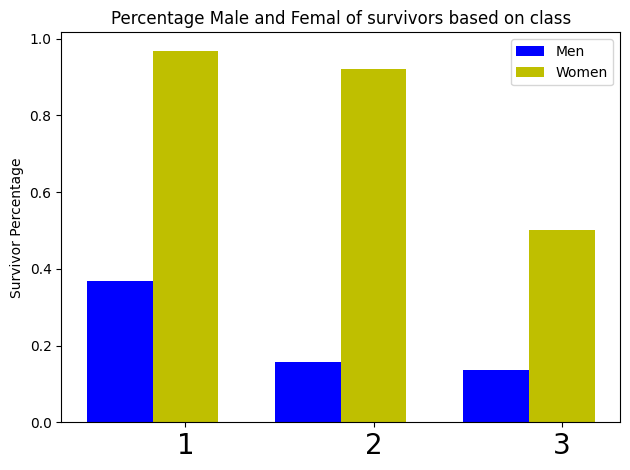

In [51]:
#Plotting the percentage of passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivor_percentage.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivor_percentage, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivor_percentage, bar_width, color='y', label='Women')
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage Male and Femal of survivors based on class')
xTickMarks = male_survivor_percentage.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()


What is the distribution of nonsurvivors among the various classes who have family aboard the ship?

In [52]:
#Checking for the null values
df['SibSp'].isnull().value_counts()

False    891
Name: SibSp, dtype: int64

In [53]:
#Checking for the null values
df['Parch'].isnull().value_counts()

False    891
Name: Parch, dtype: int64

In [54]:
#Total number of non-survivors in each class
non_survivors = df[(df['SibSp']>0) | (df['Parch'] > 0 ) & (df['Survived'] == 0)].groupby('Pclass')['Survived'].agg('count')

In [55]:
#Total passergers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
non_survivor_percentage = non_survivors / total_passengers

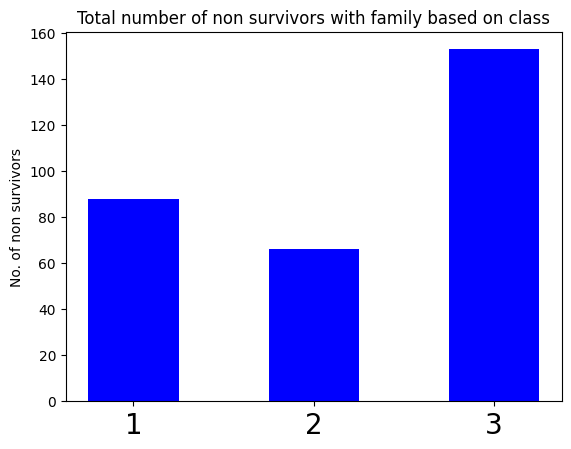

In [56]:
#Total number of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivors.index.values.tolist(), non_survivors, color='blue', width=0.5)
ax.set_ylabel('No. of non survivors')
ax.set_title('Total number of non survivors with family based on class')
xTickMarks = non_survivors.index.values.tolist()
ax.set_xticks(non_survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

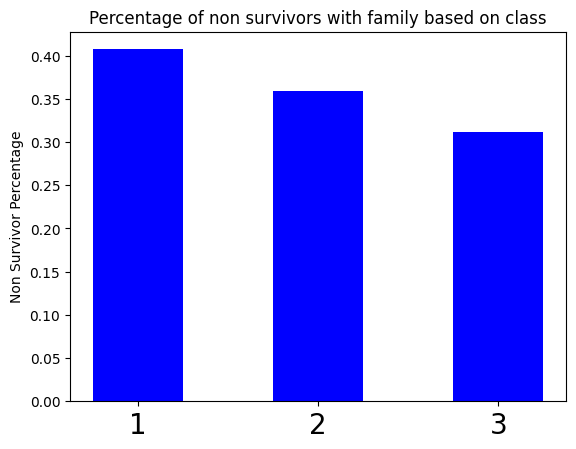

In [57]:
#Plot of percentage of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivor_percentage.index.values.tolist(), non_survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Non Survivor Percentage')
ax.set_title('Percentage of non survivors with family based on class')
xTickMarks = non_survivor_percentage.index.values.tolist()
ax.set_xticks(non_survivor_percentage.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

What was the survival percentage among different age groups?

In [58]:
#Checking for null values
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

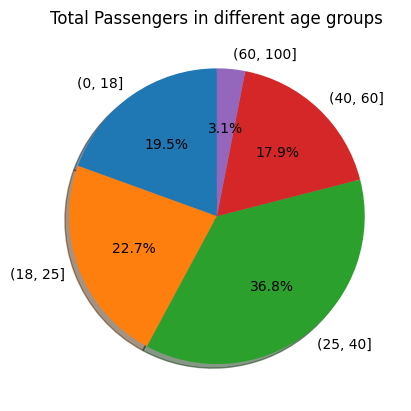

In [59]:
#Defining the age binning interval
age_bin = [0, 18, 25, 40, 60, 100]

#Creating the bins
df['AgeBin'] = pd.cut(df.Age, bins=age_bin)

#removing the null rows
d_temp = df[np.isfinite(df['Age'])] #removing all na instances

#Number of survivors based on Age bin
survivors = d_temp.groupby('AgeBin')['Survived'].agg(sum)

#Total passengers in each bin
total_passengers = d_temp.groupby('AgeBin')['Survived'].agg('count')

#Plotting the pie chart of total passengers in each bin
plt.pie(total_passengers, labels=total_passengers.index.values.tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Total Passengers in different age groups')
plt.show()

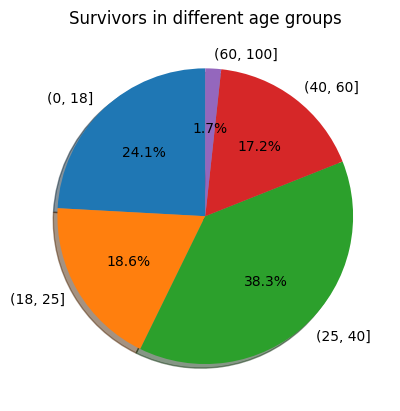

In [60]:
#Plotting the pie chart of percentage passengers in each bin
plt.pie(survivors, labels = survivors.index.values.tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Survivors in different age groups')
plt.show()

In [61]:
#Estimating the Likelihood of Events
df.count(0)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
AgeBin         714
dtype: int64

In [62]:
#We'll remove these two columns from our DataFrame:
## Applying axis as 1 to remove the  columns with the following labels
df = df.drop(['Ticket', 'Cabin','Name'], axis=1)

#remove missing values
df = df.dropna()


In [63]:
#Creating training and testing sets
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + + C(Embarked) + Parch'

In [64]:
# create a results dictionary to hold our regression results for easy
# analysis later
df_train = df.iloc[ 0: 600, : ]
df_test = df.iloc[ 600: , : ]

In [65]:
#Splitting the data into dependent and independent variables
y_train, x_train = dmatrices(formula, data=df_train, return_type = 'dataframe')
y_test, x_test = dmatrices(formula, data=df_test, return_type='dataframe')

Building a model
We'll use the statsmodels package to build a model:

In [66]:
#instantiate our model
model = sm.Logit(y_train, x_train)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.450031
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  600
Model:                          Logit   Df Residuals:                      591
Method:                           MLE   Df Model:                            8
Date:                Thu, 05 Jan 2023   Pseudo R-squ.:                  0.3333
Time:                        13:54:38   Log-Likelihood:                -270.02
converged:                       True   LL-Null:                       -404.99
Covariance Type:            nonrobust   LLR p-value:                 1.009e-53
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.3332      0.510      8.490      0.000       3.333       5.334
C(Pclass)[T.2]      -1.2030      0.325     -3.703      0.000      -1.840      -0.566
C(Pclass)[T.3]      -2.4673      0.320     -7.705      0.000      -3.095      -1.840
C(Sex)[T.male]      -2.6312      0.244    -10.797      0.000      -3.109      -2.154
C(Embarked)[T.Q]    -0.4359      0.647     -0.674      0.501      -1.704       0.832
C(Embarked)[T.S]    -0.2910      0.297     -0.980      0.327      -0.873       0.291
Age                 -0.0397      0.009     -4.464      0.000      -0.057      -0.022
SibSp               -0.3202      0.136     -2.354      0.019      -0.587      -0.054
Parch               -0.1420      0.136     -1.041      0.298      -0.409       0.125
====================================================================================
"""

In [67]:
#We'll rebuild the model by using predictors, such as class, age, sex and number of siblings:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp '
y_train, x_train = dmatrices(formula, data=df_train, return_type='dataframe')

#instantiate our model
model = sm.Logit(y_train, x_train)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.451793
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  600
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                            5
Date:                Thu, 05 Jan 2023   Pseudo R-squ.:                  0.3307
Time:                        13:54:39   Log-Likelihood:                -271.08
converged:                       True   LL-Null:                       -404.99
Covariance Type:            nonrobust   LLR p-value:                 8.172e-56
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.1050      0.479      8.575      0.000       3.167       5.043
C(Pclass)[T.2]    -1.2971      0.306     -4.242      0.000      -1.896      -0.698
C(Pclass)[T.3]    -2.5739      0.305     -8.433      0.000      -3.172      -1.976
C(Sex)[T.male]    -2.5808      0.235    -10.996      0.000      -3.041      -2.121
Age               -0.0401      0.009     -4.549      0.000      -0.057      -0.023
SibSp             -0.3691      0.130     -2.840      0.005      -0.624      -0.114
==================================================================================
"""

Model evaluation
Now, let's see the distribution of the predictions on the training data with the following code:

Text(0.5, 1.0, 'Distribution of our Predictions')

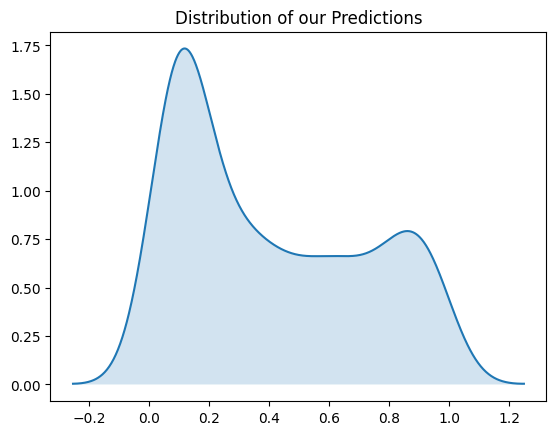

In [68]:
kde_res = sm.nonparametric.KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support, kde_res.density)
plt.fill_between(kde_res.support, kde_res.density, alpha=0.2)
plt.title("Distribution of our Predictions")

/tmp/ipykernel_29161/3760390175.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='x')


'\nIn the preceding code, we created a scatter plot between the predicted probability of\nsurvival and a flag indicating that the passengers are male.'

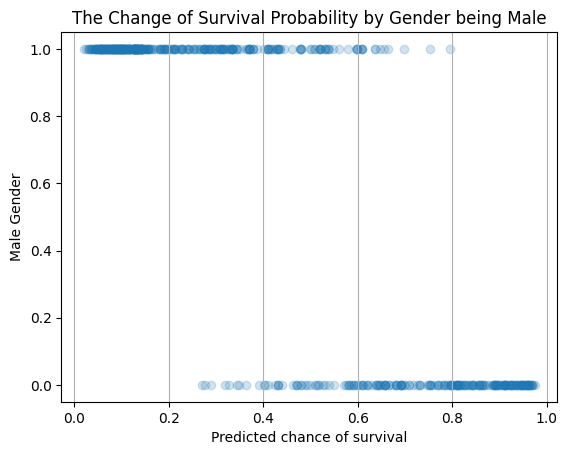

In [69]:
#Let's see the prediction distribution based on the male gender
plt.scatter(res.predict(), x_train['C(Sex)[T.male]'], alpha = 0.2)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Male Gender")
plt.title("The Change of Survival Probability by Gender being Male")

"""
In the preceding code, we created a scatter plot between the predicted probability of
survival and a flag indicating that the passengers are male."""

/tmp/ipykernel_29161/354764599.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='x')


'\nWe can see that the lower class passengers have a lower probability of survival as the\nprobability is more concentrated toward 0 when compared to the other classes.'

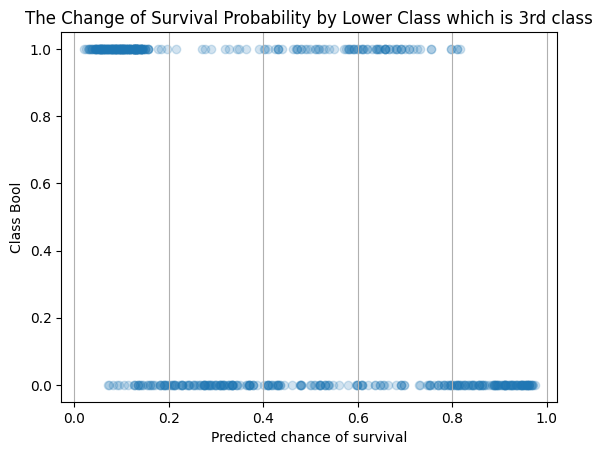

In [70]:
#Now, let's see the distribution of the prediction based on the lower class of
#the passengers
plt.scatter(res.predict(), x_train['C(Pclass)[T.3]'], alpha=0.2)
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool") #Boolean class to show if its 3rd class
plt.grid(b=True, which='major', axis='x')
plt.title("The Change of Survival Probability by Lower Class which is 3rd class")
"""
We can see that the lower class passengers have a lower probability of survival as the
probability is more concentrated toward 0 when compared to the other classes."""


Text(0, 0.5, 'Age')

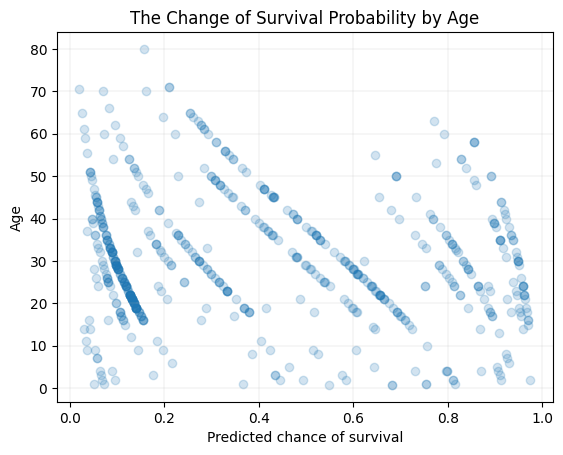

In [71]:
#Let's see the distribution of the probability with respect to the age of the passengers:
plt.scatter(res.predict(), x_train.Age, alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("Age")


If you observe the preceding plot, it can be seen that as the age of the passenger increases, the probability leans toward the left-hand side of the graph, which shows that elderly people have a lower probability of survival.

Text(0, 0.5, 'No. of Siblings/Spouses')

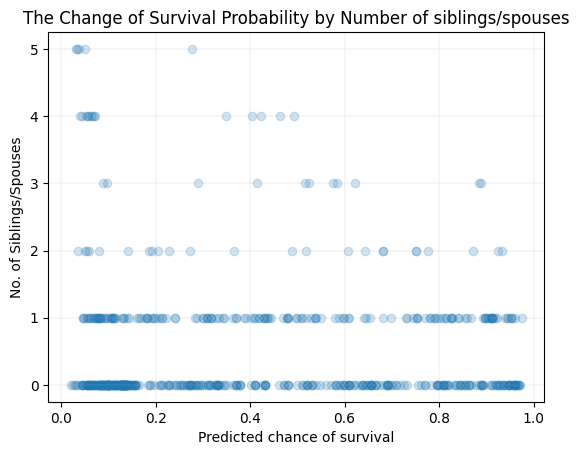

In [72]:
#Let's see the distribution of the probability with respect to the number of
#siblings/spouses:

plt.scatter(res.predict(), x_train.SibSp, alpha=0.2)
plt.grid(True, linewidth = 0.15)
plt.title("The Change of Survival Probability by Number of siblings/spouses")
plt.xlabel("Predicted chance of survival")
plt.ylabel("No. of Siblings/Spouses")

From the preceding graph, the only pattern we can see is that passengers with four  to five siblings/spouses had a lower probability of survival. For the remaining passengers, there is a more or less random distribution.

Evaluating a model based on test data
Let's predict by using the model on the test data and also show the performance of the model through precision and recall by maintaining a threshold of 0.7 :

In [73]:
y_pred = res.predict(x_test) 
y_pred_flag = y_pred > 0.7
print(pd.crosstab(y_test.Survived,y_pred_flag,rownames = ['Actual']
,colnames = ['Predicted']))

ValueError: shapes (112,9) and (6,) not aligned: 9 (dim 1) != 6 (dim 0)

In [39]:
print(classification_report(y_test,y_pred_flag))

NameError: name 'y_pred_flag' is not defined

In the preceding code, we get the predicted probability on the test data followed by assigning True or False for an event based on the threshold of 0.7 . We use the
crosstab function of pandas, which helps in displaying the frequency distribution between two variables. We'll use this to get the crosstab between the actual and predicted values, and then we will use the classification_report function of
SciKit to get the precision and recall values:

We can see that all the nonsurvivors have been predicted correctly, but the model is able to predict only half of the survivors correctly based on the 0.7 threshold. Note that the precision and recall values will vary with the threshold that is used. Let's understand what precision and recall mean.
• Precision: Precision tells you that among all the predictions of class 0 or class 1, how many of them have been correctly predicted. So, in the preceding case, 76% of the prediction of nonsurvivors is correct and 100% of the
prediction of those who have survived is correct.
• Recall: Recall tells you that out of the actual instances, how many of them have been predicted correctly. So, in the preceding case, all the people who did not survive have been predicted correctly with an accuracy of 100%, but of all the
people who survived, only 53% of them have been predicted correctly.

In [74]:
#Let's plot the Receiver Operating Characteristic (ROC) curve, which will be explained as follows:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred[:,1])
roc_auc = auc(fpr, tpr)
print("Area unders the ROC surve: %f" % roc_auc)


NameError: name 'y_pred' is not defined

In [75]:
# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

NameError: name 'fpr' is not defined

<Figure size 640x480 with 0 Axes>